In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shark-attacks/attacks.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/shark-attacks/attacks.csv')

In [4]:
df.head()
# right off, it seems the Case Number and Year columns are redundant... we'll drop them

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [5]:
df.drop(['Case Number', 'Year'], axis =1, inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6094 non-null   object 
 1   Type                    6090 non-null   object 
 2   Country                 6048 non-null   object 
 3   Area                    5682 non-null   object 
 4   Location                5583 non-null   object 
 5   Activity                5559 non-null   object 
 6   Name                    5888 non-null   object 
 7   Sex                     5517 non-null   object 
 8   Age                     3374 non-null   object 
 9   Injury                  6066 non-null   object 
 10  Fatal (Y/N)             6064 non-null   object 
 11  Time                    2848 non-null   object 
 12  Species                 3100 non-null   object 
 13  Investigator or Source  6077 non-null   object 
 14  pdf                     6094 non-null 

In [7]:
# similarly, the columns : 'Investigator' 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2'
# and 'original order' contain either redundant or irrelevant information for prediction 
# purposes. The columns: 'Investigator' 'pdf', 'href formula', 'href',
# would be helpful to dig into the dataset more
# For exploratory purposes, we drop these columns.
df.columns

Index(['Date', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [8]:
df.drop(['Name','Investigator or Source','pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'], axis = 1, inplace = True)

In [9]:
# this dataset is full of null values. We cannot impute as the data is text based. 
df.isnull().sum()/len(df)
#Let's see where the null values lie in the data

Date           0.762083
Type           0.762239
Country        0.763879
Area           0.778168
Location       0.782033
Activity       0.782970
Sex            0.784610
Age            0.868275
Injury         0.763176
Fatal (Y/N)    0.763254
Time           0.888811
Species        0.878972
dtype: float64

<AxesSubplot:>

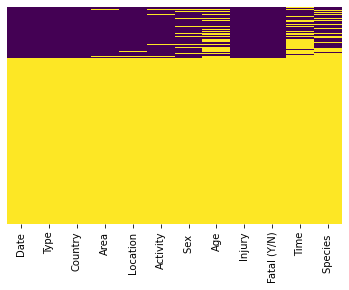

In [10]:
sns.heatmap(df.isnull(), yticklabels = False,cbar = False, cmap = 'viridis')
# Yellow is NaN here. A huge swath of this data is missing. Let's first just remove all rows
 # that only contain the enrty Nan

In [11]:
df.dropna(axis = 0, how = 'all', inplace = True)

<AxesSubplot:>

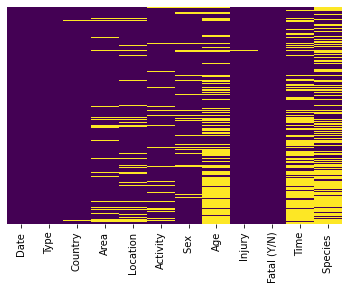

In [12]:
sns.heatmap(df.isnull(), yticklabels = False,cbar = False, cmap = 'viridis')
# Now it is clear that the 'Age', 'Time' and 'Species' columns are missing a lot information

In [13]:
# There are now at least two approaches. The first approach is to delete the 'Age','Time' and
#'Species' column, then delete remaining rows with NaN and proceed. 

# The species and time columns are interesting features...is there a shark that attacks 
#humans more frequently? What time do these attacks occur?

# For now, we'll take the first approach for sanity sake!

In [14]:
# copies of dataframe up until now
# data is dropped according to discussion above
df1 = df.copy(deep = True)
df1.drop(['Age', 'Time', 'Species '], axis = 1, inplace = True)
df1.dropna(axis = 0, how = 'any', inplace = True)

<AxesSubplot:>

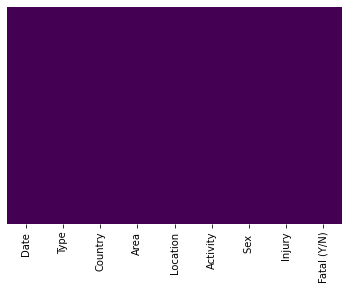

In [15]:
#df1 now has no missing data (it is not clean though!)
sns.heatmap(df1.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')

In [16]:
df1.info()
# 4601 entries by first removing 'Age', 'Time' and 'Species' columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 6093
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         4601 non-null   object
 1   Type         4601 non-null   object
 2   Country      4601 non-null   object
 3   Area         4601 non-null   object
 4   Location     4601 non-null   object
 5   Activity     4601 non-null   object
 6   Sex          4601 non-null   object
 7   Injury       4601 non-null   object
 8   Fatal (Y/N)  4601 non-null   object
dtypes: object(9)
memory usage: 359.5+ KB


# Cleaning up the data features columns...

<AxesSubplot:xlabel='Fatal (Y/N)', ylabel='count'>

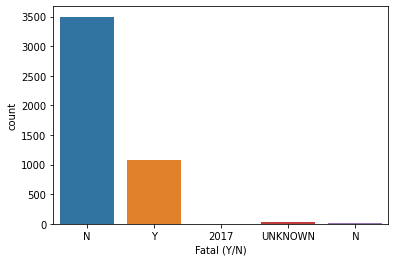

In [17]:
# fatal data column is not neatly classified
sns.countplot(x = df1['Fatal (Y/N)'], data = df1)

In [18]:
# appears that six non-fatal encounters are classified as ' N'. we need to group 
# these with the 'N' category and get rid of the 'UNKNOWN' and '2017' entrys.
df1['Fatal (Y/N)'].value_counts()

N          3497
Y          1075
UNKNOWN      22
 N            6
2017          1
Name: Fatal (Y/N), dtype: int64

In [19]:
df1[df1['Fatal (Y/N)'] == ' N']['Fatal (Y/N)'].iloc[0:5]

3802     N
3804     N
3806     N
3807     N
3813     N
Name: Fatal (Y/N), dtype: object

In [20]:
# replacing ' N' values with 'N' in fatal column
if df1[df1['Fatal (Y/N)'] == ' N']['Fatal (Y/N)'].iloc[0]:
    df1.replace(to_replace = df1[df1['Fatal (Y/N)'] == ' N']['Fatal (Y/N)'].iloc[0],\
    value = 'N',inplace = True)
    
df1['Fatal (Y/N)'].value_counts()

N          3503
Y          1075
UNKNOWN      22
2017          1
Name: Fatal (Y/N), dtype: int64

In [21]:
df1[df1['Fatal (Y/N)'] == 'UNKNOWN']['Fatal (Y/N)'].index.values

array([2401, 2520, 2855, 2865, 3270, 3288, 3300, 3410, 3652, 4127, 5014,
       5044, 5073, 5124, 5259, 5402, 5498, 5501, 5551, 5552, 5814, 5962])

In [22]:
# As we do not know what the 'UNKNOWN' and '2017' labels correspond to, we'll have to
# drop these rows
df1.drop(index = df1[df1['Fatal (Y/N)'] == 'UNKNOWN']['Fatal (Y/N)'].index.values,\
        inplace = True)

df1.drop(index = df1[df1['Fatal (Y/N)'] == '2017']['Fatal (Y/N)'].index.values,\
        inplace = True)

df1['Fatal (Y/N)'].value_counts()

N    3503
Y    1075
Name: Fatal (Y/N), dtype: int64

<AxesSubplot:xlabel='Fatal (Y/N)', ylabel='count'>

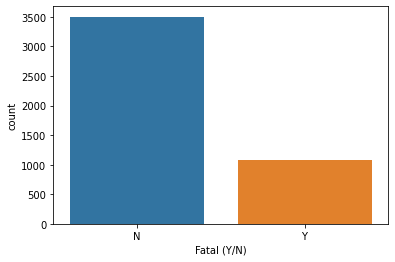

In [23]:
sns.countplot(x = 'Fatal (Y/N)', data = df1)

In [24]:
# dummy variables for Fatal (Y/N) column
fatal = pd.get_dummies(df1['Fatal (Y/N)'], drop_first = True)
df1.drop('Fatal (Y/N)', axis = 1, inplace = True)
df1 = pd.concat([df1, fatal], axis = 1)

<AxesSubplot:xlabel='Sex ', ylabel='count'>

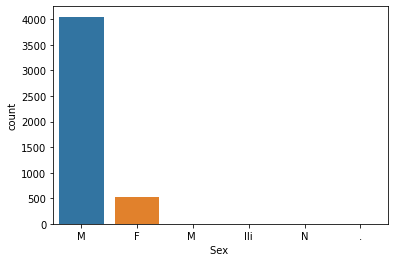

In [25]:
# We can use the same approach for the 'Type', 'Activity', 'Sex' and 'Area' columns:

#we'll work on the 'Sex column first'
sns.countplot(x = 'Sex ', data = df1)

In [26]:
df1['Sex '].value_counts()

M      4052
F       521
M         2
.         1
lli       1
N         1
Name: Sex , dtype: int64

In [27]:
if df1[df1['Sex '] == 'M ']['Sex '].iloc[0]:
    df1.replace(to_replace = df1[df1['Sex '] == 'M ']['Sex '].iloc[0], value = 'M',\
               inplace = True)
    
df1['Sex '].value_counts()

M      4054
F       521
.         1
lli       1
N         1
Name: Sex , dtype: int64

In [28]:
#dropping remaing ambiguous 'Sex' labels
df1.drop(df1[df1['Sex '] == 'lli']['Sex '].index.values, inplace = True)
df1.drop(df1[df1['Sex '] == '.']['Sex '].index.values, inplace = True)
df1.drop(df1[df1['Sex '] == 'N']['Sex '].index.values, inplace = True)
df1['Sex '].value_counts()

M    4054
F     521
Name: Sex , dtype: int64

<AxesSubplot:xlabel='Sex ', ylabel='count'>

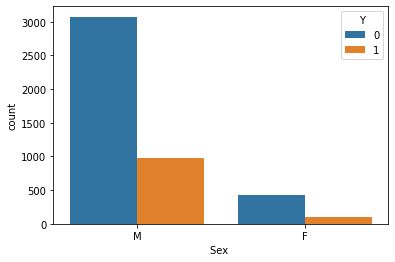

In [29]:
sns.countplot(x = 'Sex ', data = df1, hue = 'Y')

In [30]:
sex = pd.get_dummies(df1['Sex '], drop_first = True)
df1.drop('Sex ', axis = 1, inplace = True)
df1 = pd.concat([df1, sex], axis = 1)

In [31]:
# moving on to the 'Type' column
df1['Type'].value_counts()
# 'Boat' and 'Boating' columns can be merged

Unprovoked      3663
Provoked         426
Invalid          318
Sea Disaster      83
Boat              54
Boating           31
Name: Type, dtype: int64

In [32]:
#merging Boat and Boating columns
if df1[df1['Type'] == 'Boat']['Type'].iloc[0]:
    df1.replace(to_replace = df1[df1['Type'] == 'Boat']['Type'].iloc[0], value = 'Boating',\
               inplace = True)
df1['Type'].value_counts()
#we'll keep the invalid column as we lack additional information to change it

Unprovoked      3663
Provoked         426
Invalid          318
Boating           85
Sea Disaster      83
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

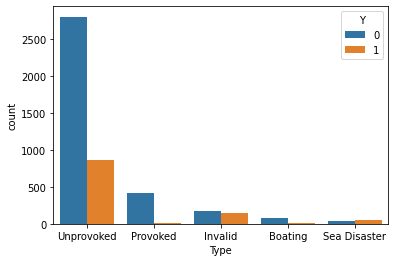

In [33]:
sns.countplot(x = 'Type', data = df1, hue = 'Y')
# sea diaster entries are most fatal. Possibly due to time in the water/presence of blood
# number of people...

In [34]:
type = pd.get_dummies(df1['Type'], drop_first= True)
df1.drop('Type', axis = 1, inplace = True)
df1 = pd.concat([df1, type], axis = 1)

In [35]:
# Now the 'Activity column'
# some simple typos to correct and then some larger explainations...

# first we make everything lowercase
for i in range(len(df1['Activity'])):
    df1['Activity'].iloc[i] = df1['Activity'].iloc[i].lower()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
# capturing and classifiying as many 'activities' as possible

# some activities are lumped together for processing 
for i in range(len(df1['Activity'])):
    
    if 'surfing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surfing', inplace = True)
    elif 'surfing,' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surfing', inplace = True)
    elif 'surfboard' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surfing', inplace = True)
    elif 'swimming' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'swimming,' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'bathing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'floating' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'water' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'fishing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'fishing', inplace = True)
    elif 'fishing,' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'fishing', inplace = True)
    elif 'wading' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'wading', inplace = True)
    elif 'standing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'wading', inplace = True)
    elif 'boogie' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'body boarding', inplace = True)
    elif 'body-boarding' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'body boarding', inplace = True)
    elif 'bodyboarding' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'body boarding', inplace = True)
    elif 'spearfishing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'spearfishing', inplace = True)
    elif 'spearfishing,' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'spearfishing', inplace = True)
    elif 'diving' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'diving', inplace = True)
    elif 'freediving' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'diving', inplace = True)
    elif 'skindiving' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'diving', inplace = True)
    elif 'snorkeling' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'snorkeling', inplace = True)
    elif 'surf-skiing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surf skiing', inplace = True)
    elif 'skiing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surf skiing', inplace = True)
    elif 'canoeing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'kayaking', inplace = True)


In [37]:
pd.set_option('max_rows', None)
print(df1['Activity'].value_counts()[:13].sum())
print('\n')
df1['Activity'].value_counts()[:13].sum()/df1['Activity'].value_counts().sum()
#we'll drop all activities that have less than ten entrys. 
#We're keeping 88% with this cut off

4034




0.8817486338797814

In [38]:
act_list = df1['Activity'].value_counts()[:13].index.values

In [39]:
drop_act = []
for i in range(len(df1)):
    if df1['Activity'].iloc[i] not in act_list: 
        drop_act = np.append(drop_act,  int(df1['Activity'].index[i]))

drop_act = list(map(int, drop_act))

In [40]:
df1.drop(index = drop_act, inplace = True)

<AxesSubplot:xlabel='Activity', ylabel='count'>

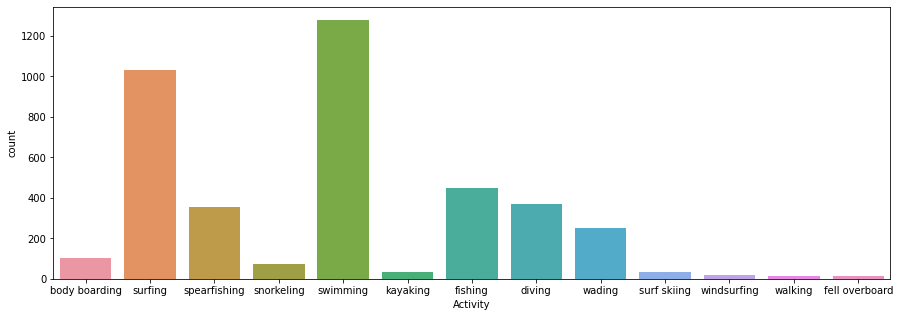

In [41]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Activity', data = df1)

<AxesSubplot:xlabel='Activity', ylabel='count'>

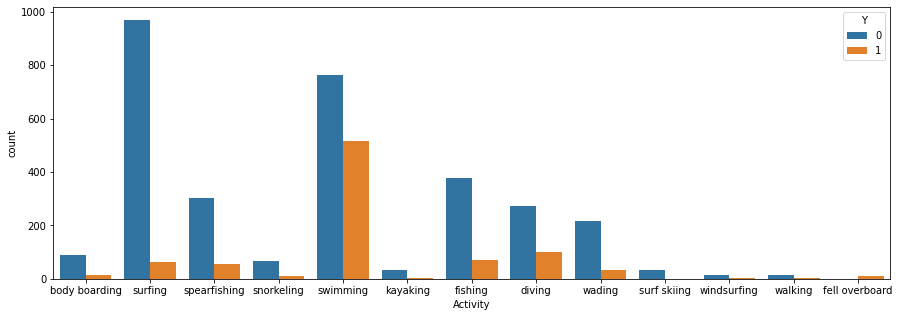

In [42]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Activity', data = df1, hue = 'Y')
# swimming (and the activities that are lumped there) have the greatest fatality rate

In [43]:
act_dum = pd.get_dummies(df1['Activity'], drop_first=True)
df1.drop('Activity', axis =1, inplace = True)
df1 = pd.concat([df1, act_dum], axis=1)

In [44]:
#let's remove the injury as it does not help with predictive properties. Also, we'll drop 
# 'Country' and 'Location' Columns and focus on the 'Area'
df1.drop(['Injury', 'Country', 'Location'], axis = 1, inplace = True)

In [45]:
# Again, collecting 'Area' entrys with value counts greater than 9
area_list = df1['Area'].value_counts()[:32].index.values

In [46]:
drop_area = []
for i in range(len(df1)):
    if df1['Area'].iloc[i] not in area_list: 
        drop_area = np.append(drop_area,  int(df1['Area'].index[i]))

drop_area = list(map(int, drop_area))

In [47]:
df1.drop(index = drop_area, inplace = True)

<AxesSubplot:xlabel='Area', ylabel='count'>

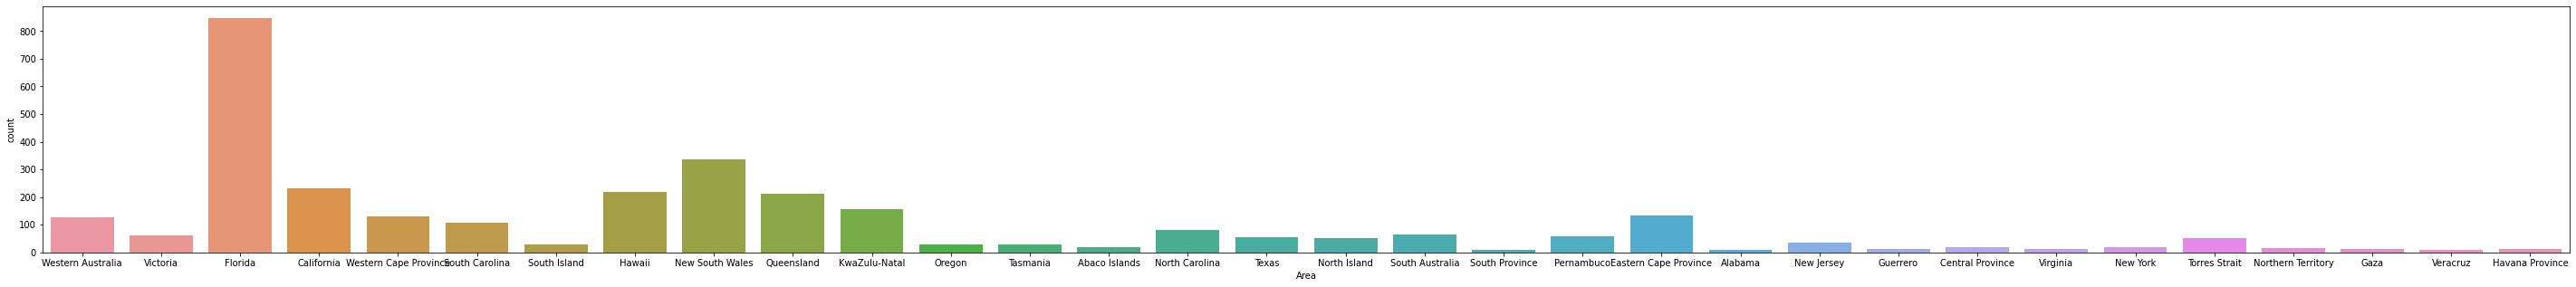

In [48]:
plt.figure(figsize = (50,5))
sns.countplot(x = 'Area', data = df1)

<AxesSubplot:xlabel='Area', ylabel='count'>

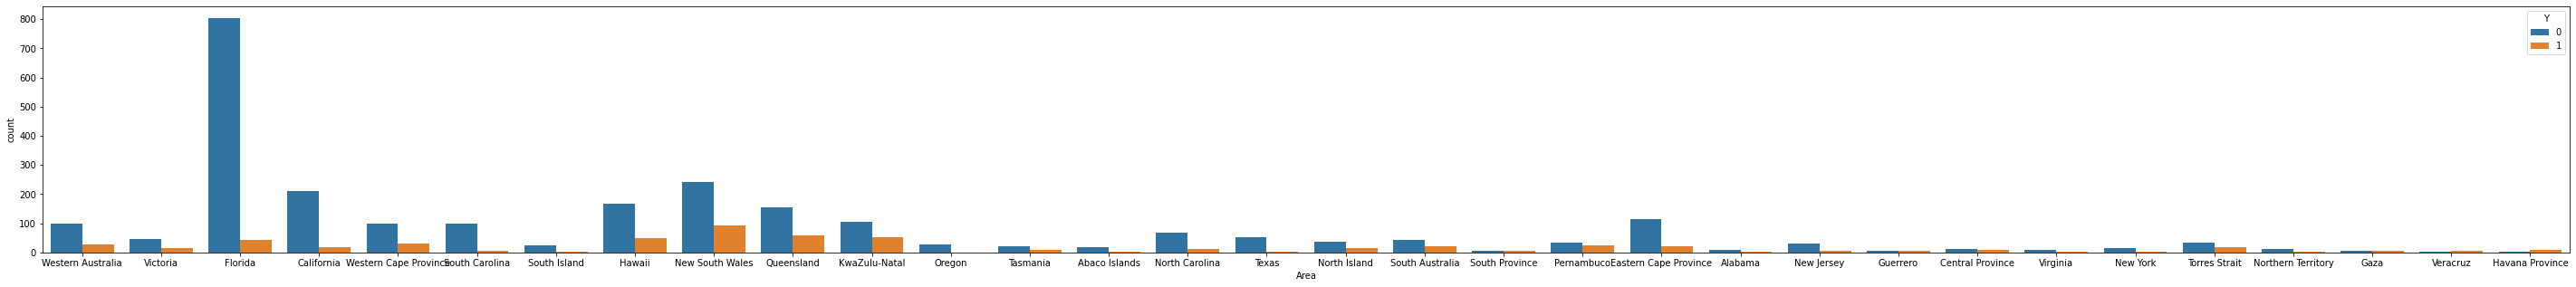

In [49]:
plt.figure(figsize = (50,5))
sns.countplot(x = 'Area', data = df1, hue = 'Y')
# New South Wales has the greatest fatality rate per shark attack.

In [50]:
area_dum = pd.get_dummies(df1['Area'], drop_first=True)
df1.drop('Area', axis = 1, inplace = True)
df1 = pd.concat([df1, area_dum], axis = 1)

# Now for the Date Column...

In [51]:
# We'll keep only the year

# year column
df1['Year'] = df1['Date'].apply(lambda x:x.split('-')[0])

In [52]:
#correcting the nonyear values

wrong_year_val = []
wrong_year_ind = []
for i in range(len(df1['Year'])):
    if len(df1['Year'].iloc[i]) > 4:
        wrong_year_val = np.append(wrong_year_val, df1['Date'].iloc[i])
        wrong_year_ind = np.append(wrong_year_ind, df1['Date'].index[i])
    elif len(df1['Year'].iloc[i]) < 4:
        wrong_year_val = np.append(wrong_year_val, df1['Date'].iloc[i])
        wrong_year_ind = np.append(wrong_year_ind, df1['Date'].index[i])

wrong_year_ind = list(map(int, wrong_year_ind))

In [53]:
#replacing nonyear values

drop_wrongdf = pd.DataFrame(wrong_year_val)
split_year = drop_wrongdf[0].apply(lambda x:x.split('-'))

for i in range(len(split_year)):
    df1['Year'].at[wrong_year_ind[i]] = split_year[i][-1]

In [54]:
#final cleaning and dropping remaining erroneous values
df1['Year'] = df1['Year'].apply(lambda x:x.split()[-1])
df1.drop(df1[df1['Year'].map(len)!=4].index, inplace = True)
df1.drop(df1[df1['Year']> '2021'].index, inplace = True)
df1['Year'] = list(map(int, df1['Year']))
len(df1)

3104

<AxesSubplot:xlabel='Year', ylabel='count'>

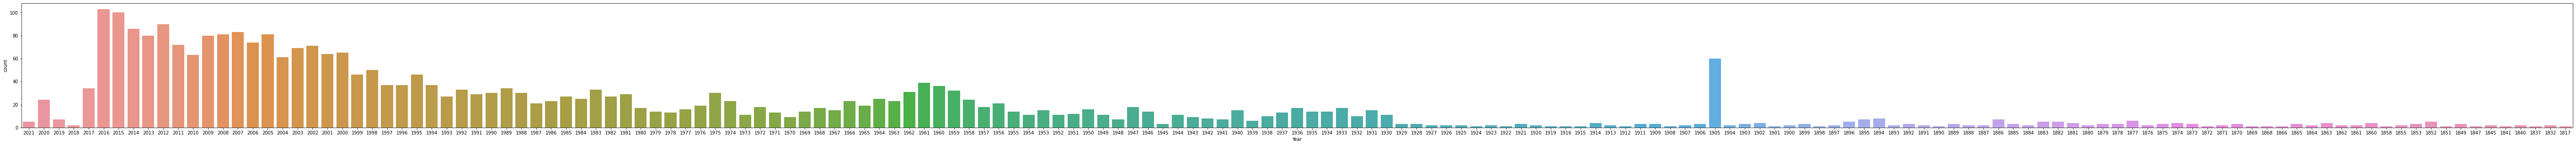

In [55]:
# reported shark attacks have certainly increased...what happened in 1905?
plt.figure(figsize=(100,5))
year_order = sorted(df1['Year'].unique(), reverse = True)
sns.countplot(x = 'Year',order = year_order, data = df1)

In [56]:
#removing the 'Date' column
df1.drop('Date', axis =1, inplace = True)

In [57]:
df1.columns

Index(['Y', 'M', 'Invalid', 'Provoked', 'Sea Disaster', 'Unprovoked', 'diving',
       'fell overboard', 'fishing', 'kayaking', 'snorkeling', 'spearfishing',
       'surf skiing', 'surfing', 'swimming', 'wading', 'walking',
       'windsurfing', 'Alabama', 'California', 'Central Province',
       'Eastern Cape Province', 'Florida', 'Gaza', 'Guerrero',
       'Havana Province', 'Hawaii', 'KwaZulu-Natal', 'New Jersey',
       'New South Wales', 'New York', 'North Carolina', 'North Island',
       'Northern Territory', 'Oregon', 'Pernambuco', 'Queensland',
       'South Australia', 'South Carolina', 'South Island', 'South Province',
       'Tasmania', 'Texas', 'Torres Strait', 'Veracruz', 'Victoria',
       'Virginia', 'Western Australia', 'Western Cape Province', 'Year'],
      dtype='object')

In [58]:
# we are now ready to train a classification model! 
df1.select_dtypes(['object']).columns

Index([], dtype='object')

In [59]:
# We'll attempt to predict whether or not an attack will be fatal
from sklearn.model_selection import train_test_split
X = df1.drop('Y', axis = 1).values
y = df1['Y'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training Models

# Logistic Regression

In [61]:
# We'll train four classification models: Logistic Regression, Decision tree classifier,
# random forest classifer and XGBoost

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver ='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, lr_pred))
print('\n')
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(accuracy_score(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       770
           1       0.68      0.10      0.18       162

    accuracy                           0.84       932
   macro avg       0.76      0.55      0.55       932
weighted avg       0.81      0.84      0.78       932



[[762   8]
 [145  17]]


0.8358369098712446


# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [64]:
print(classification_report(y_test, dtc_pred))
print('\n')
print(confusion_matrix(y_test, dtc_pred))
print('\n')
print(accuracy_score(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       770
           1       0.42      0.36      0.39       162

    accuracy                           0.80       932
   macro avg       0.64      0.63      0.63       932
weighted avg       0.79      0.80      0.80       932



[[690  80]
 [104  58]]


0.8025751072961373


# Random Forest Classifer

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [66]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       770
           1       0.47      0.33      0.39       162

    accuracy                           0.82       932
   macro avg       0.67      0.62      0.64       932
weighted avg       0.80      0.82      0.81       932



[[710  60]
 [109  53]]


0.8186695278969958


# XGBoost Classifier

In [69]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(use_label_encoder = False)
xgbc.fit(X_train, y_train)
xgbc_pred = xgbc.predict(X_test)

[16:51:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
print(classification_report(y_test, xgbc_pred))
print('\n')
print(confusion_matrix(y_test, xgbc_pred))
print('\n')
print(accuracy_score(y_test, xgbc_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       770
           1       0.57      0.34      0.43       162

    accuracy                           0.84       932
   macro avg       0.72      0.64      0.67       932
weighted avg       0.82      0.84      0.82       932



[[729  41]
 [107  55]]


0.8412017167381974


# XGBoost Wins! (barely)